In [4]:
import pandas as pd
import numpy as np

PATH = '/home/clarkson/data/us_eq/cache' 

df = pd.read_pickle('{}/cached_multi.pkl'.format(PATH))
# df.ffill(inplace=True)
# df.dropna(inplace=True)
# Post ffill should drop NaN.

In [5]:
# Compute daily absolute and log returns
df['return_d'] = df['close'].groupby(level=1).pct_change(fill_method='ffill')
df['log_r_d'] = df['close'].groupby(level=1).transform(np.log).ffill().groupby(level=1).diff()
# df.dropna(inplace=True)

kurtosis: 39.18657137945732
ticker
AAPL   -0.518692
dtype: float64 ticker
AAPL   2000-09-29
dtype: datetime64[ns]


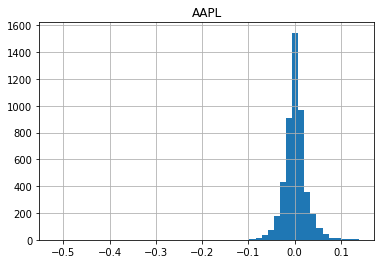

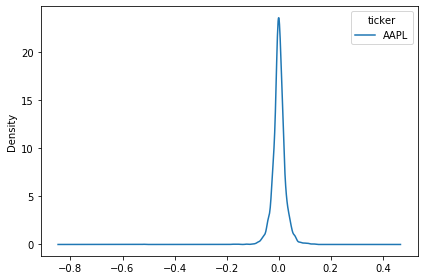

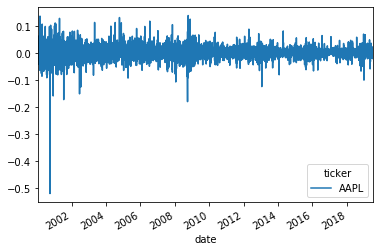

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
idx = pd.IndexSlice
aapl = df.loc[idx[:, 'AAPL'], 'return_d'].unstack(1)
aapl.hist(bins=50)
F = aapl.plot.kde()
plt.tight_layout()
print('kurtosis: {}'.format(aapl['AAPL'].kurtosis()))
print(aapl.min(), aapl.idxmin())
aapl.plot()

/homes/clarkson/PycharmProjects/us_eq/venv/lib64/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/homes/clarkson/PycharmProjects/us_eq/venv/lib64/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


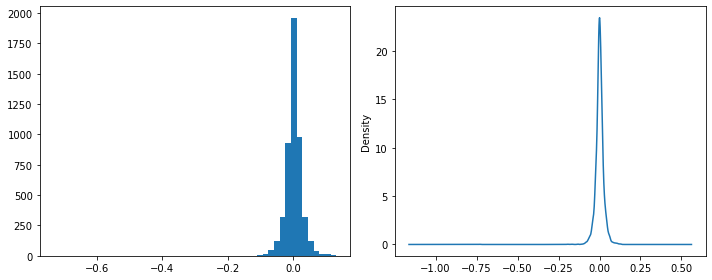

In [5]:
aapl_log = df.loc[idx[:, 'AAPL'], 'log_r_d'].unstack(1)
f, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(aapl_log, bins=50)
F = aapl_log.plot.kde()
plt.tight_layout()

We use two cleaning conditions to filter out stocks that have incorrect or corrupted data. These conditions are:
1. The stock has at least 90% non-null entries after the first non-null entry
2. The stock has a minimum daily return of greater than 100%.

In [7]:
returns = df.log_r_d.unstack(level=1)
san_1 = returns.apply(lambda x: x.min() > -1)
san_2 = df.close.unstack(level=1).apply(lambda x: x[x.first_valid_index():].notna().mean() > 0.9)
true = (san_1 & san_2)
filtered = returns[true.index[true]]
print(filtered)

ticker            AA      AABA      AAOI      AAON       AAP      AAPL  \
date                                                                     
2000-01-28       NaN       NaN       NaN       NaN       NaN       NaN   
2000-01-31  0.001730  0.026946       NaN -0.027081       NaN  0.020695   
2000-02-01  0.037314 -0.014662       NaN -0.068993       NaN -0.034317   
2000-02-02  0.031142  0.032930       NaN  0.057158       NaN -0.014443   
2000-02-03 -0.030032  0.093785       NaN  0.031253       NaN  0.044534   
...              ...       ...       ...       ...       ...       ...   
2019-07-15  0.024908  0.007141  0.000000 -0.017125  0.002142  0.009351   
2019-07-16  0.006453  0.003693 -0.015159  0.005741  0.017713 -0.003466   
2019-07-17 -0.007317 -0.001277 -0.014359 -0.012714 -0.025609 -0.005639   
2019-07-18  0.011169 -0.001136 -0.008299  0.012121  0.001458  0.011296   
2019-07-19 -0.012898 -0.001422  0.002081  0.010609 -0.006162 -0.015040   

ticker           AAT      AAXN      A

ticker
WETF    3.624341
FLOW    2.281574
GLAE    1.609438
TGIC    1.609438
ACOR    1.342559
PIR     1.321756
UVE     1.203973
EMMS    1.060872
SBRA    1.041454
DAR     1.011601
CRY     0.996712
REI     0.995139
MERC    0.993252
WCG     0.992913
MGI     0.984272
MED     0.980829
UTHR    0.976464
ICON    0.976088
VG      0.974560
GSM     0.974560
dtype: float64


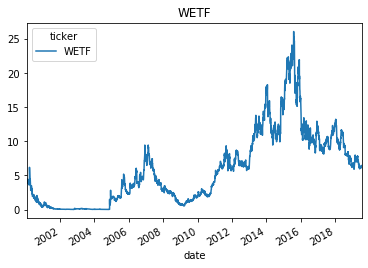

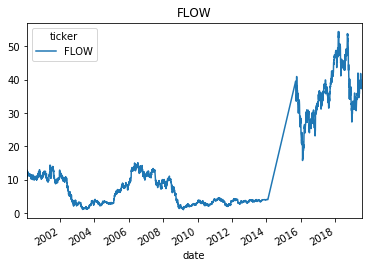

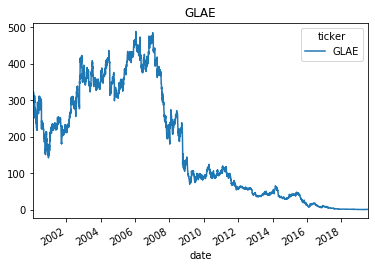

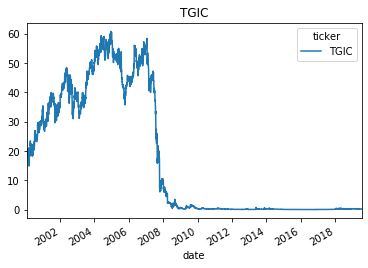

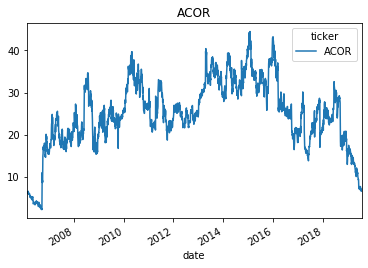

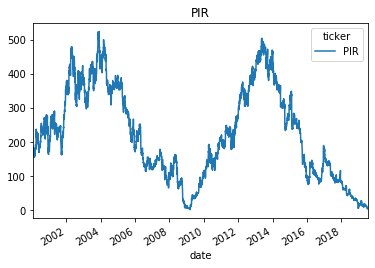

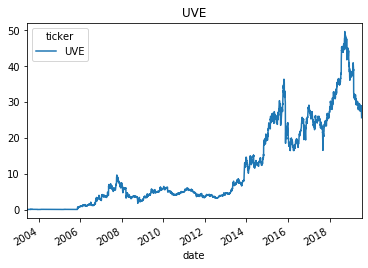

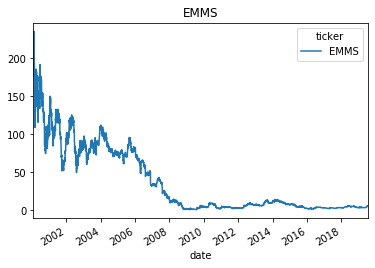

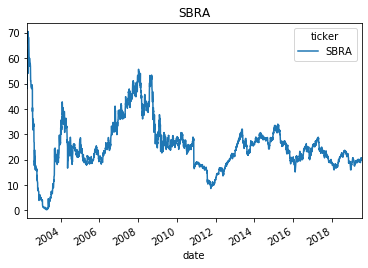

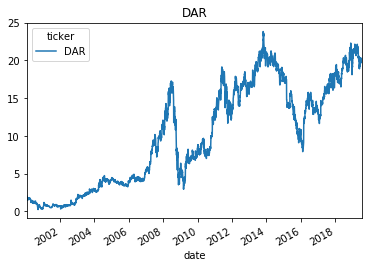

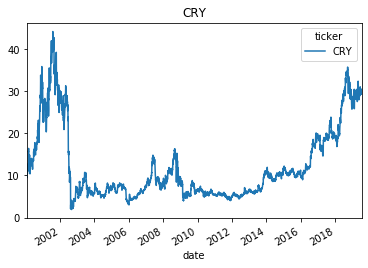

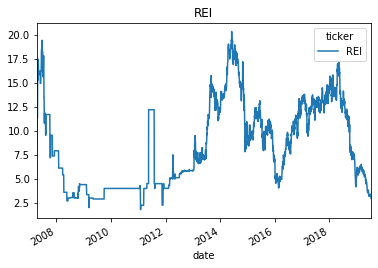

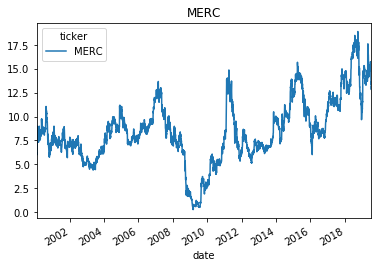

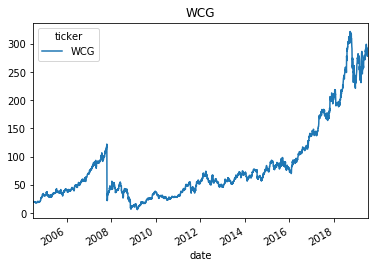

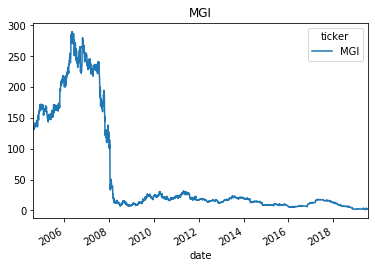

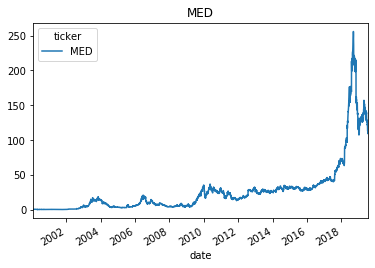

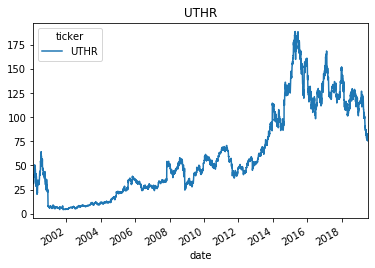

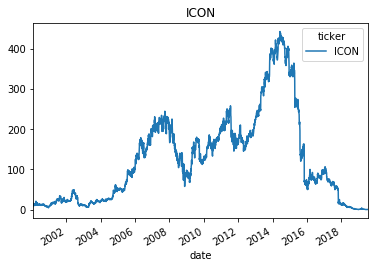

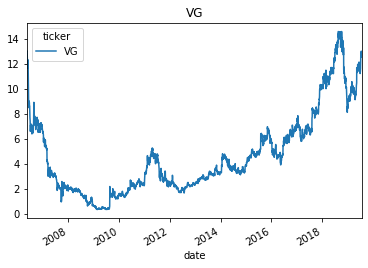

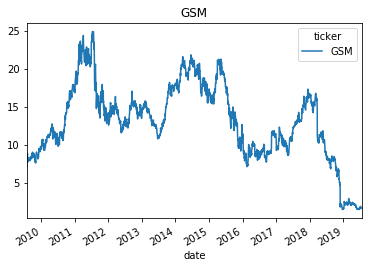

In [10]:
extremes = filtered.abs().max().nlargest(20)
print(extremes)
for ticker in extremes.index.values:
    df.loc[idx[:, ticker], 'close'].unstack(level=1).plot(title=ticker)
    plt.show()

In [11]:
filtered = filtered.drop(['BKI', 'CC', 'FSB'], axis=1)

KeyError: "['BKI' 'CC' 'FSB'] not found in axis"

In [12]:
df2 = df.loc[idx[:, filtered.columns.values], :]

In [13]:
df2.to_pickle('{}/cleaned_multi.pkl'.format(PATH))

In [14]:
df2['log_r_d'].unstack(level=1).to_pickle('{}/log_returns_cleaned.pkl'.format(PATH))